# Global Mangrove Watch

* **Products used:** 
[gmw](https://explorer.digitalearth.africa/products/gmw)

## Background

The **G**lobal **M**angrove **W**atch dataset provides information about mangrove extent. It uses ALOS PALSAR and Landsat (optical) data to form a baseline extent of mangroves. This dataset has been rasterized and indexed from the [UN Environment Program](https://data.unep-wcmc.org/datasets/45) into DE Africa's Open Data Cube. It can also be visualised in the [Global Mangrove Extent Explorer](https://www.globalmangrovewatch.org/?map=eyJiYXNlbWFwIjoibGlnaHQiLCJ2aWV3cG9ydCI6eyJsYXRpdHVkZSI6MjAsImxvbmdpdHVkZSI6MCwiem9vbSI6MiwiYmVhcmluZyI6MCwicGl0Y2giOjB9fQ%3D%3D).

The dataset can be used to identify mangrove ecosystems and monitor changes in mangrove extent. This is important in applications such as quantifying 'blue carbon', mitigating risks from natural disasters, and prioritising restoration activities.

**Important details:**

This dataset is available in 0.0002 degrees resolution (~ 24 m) for the following years:
* 1996
* 2007
* 2008
* 2009
* 2010
* 2015
* 2016
* 2017
* 2018
* 2019
* 2020

**Reference**

Bunting P., Rosenqvist A., Lucas R., Rebelo L-M., Hilarides L., Thomas N., Hardy A., Itoh T., Shimada M. and Finlayson C.M. (2018). The Global Mangrove Watch – a New 2010 Global Baseline of Mangrove Extent. Remote Sensing 10(10): 1669. doi: 10.3390/rs1010669

## Description

In this notebook we will load the Global Mangrove Watch dataset using `dc.load()`. Then we run through a short comparison of mangrove extent between years.

Topics covered include:
1. Inspecting the gmw product available in the datacube
2. Using the `dc.load()` function to load in gmw data
3. Plotting gmw

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages

In [1]:
%matplotlib inline

import datacube
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from deafrica_tools.plotting import display_map

### Connect to the datacube

In [2]:
dc = datacube.Datacube(app="gmw")

### List measurements

The table below shows that the measurement in the Global Mangrove Watch dataset is called 'mangrove', which is a binary classification where 1 corresponds to mangroves and 0 is no mangroves.

In [3]:
product_name = ['gmw'] 

dc_measurements = dc.list_measurements()
dc_measurements.loc[product_name].drop('flags_definition', axis=1)

,,name,dtype,units,nodata,aliases
product,measurement,,,,,
gmw,mangrove,mangrove,uint8,1,0.0,[classification]


## Set parameters

* `lat`, `lon`: The central latitude and longitude to analyse e.g. -16.2818, 39.8633 along the coast of Mozambique
* `buffer`: The number of square degrees to load around the central latitude and longitude. For quick loading times, set this as 0.1 or lower.
* `resolution`: We use 20 m here, as it is closest to the native resolution of 0.0002 degrees.

In [4]:
lat, lon =  -16.2818, 39.8633 #along the coast of Mozambique
buffer = 0.15

resolution=(-20, 20) 

measurements='mangrove'

#convert the lat,lon,buffer into a range
lons = (lon - buffer, lon + buffer)
lats = (lat - buffer, lat + buffer)

## View the selected location

The next cell will display the selected area on an interactive map. Feel free to zoom in and out to get a better understanding of the area you'll be analysing. Clicking on any point of the map will reveal the latitude and longitude coordinates of that point.

In [5]:
display_map(x=lons, y=lats)

## Load the Global Mangrove Watch data

In [6]:
#set up datacube query object
query = {
    'x': lons,
    'y': lats,
    'resolution':resolution,
    'output_crs': 'epsg:6933',
    'measurements':measurements
}

#load the gmw product
ds = dc.load(product="gmw", **query).squeeze()
print(ds)

<xarray.Dataset>
Dimensions:      (time: 11, y: 1839, x: 1448)
Coordinates:
  * time         (time) datetime64[ns] 1996-07-01T23:59:59.500000 ... 2020-07...
  * y            (y) float64 -2.032e+06 -2.032e+06 ... -2.068e+06 -2.068e+06
  * x            (x) float64 3.832e+06 3.832e+06 ... 3.861e+06 3.861e+06
    spatial_ref  int32 6933
Data variables:
    mangrove     (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref


### Plot mangrove extent

We can generate a basic plot of mangrove extent for each of the available years below. 

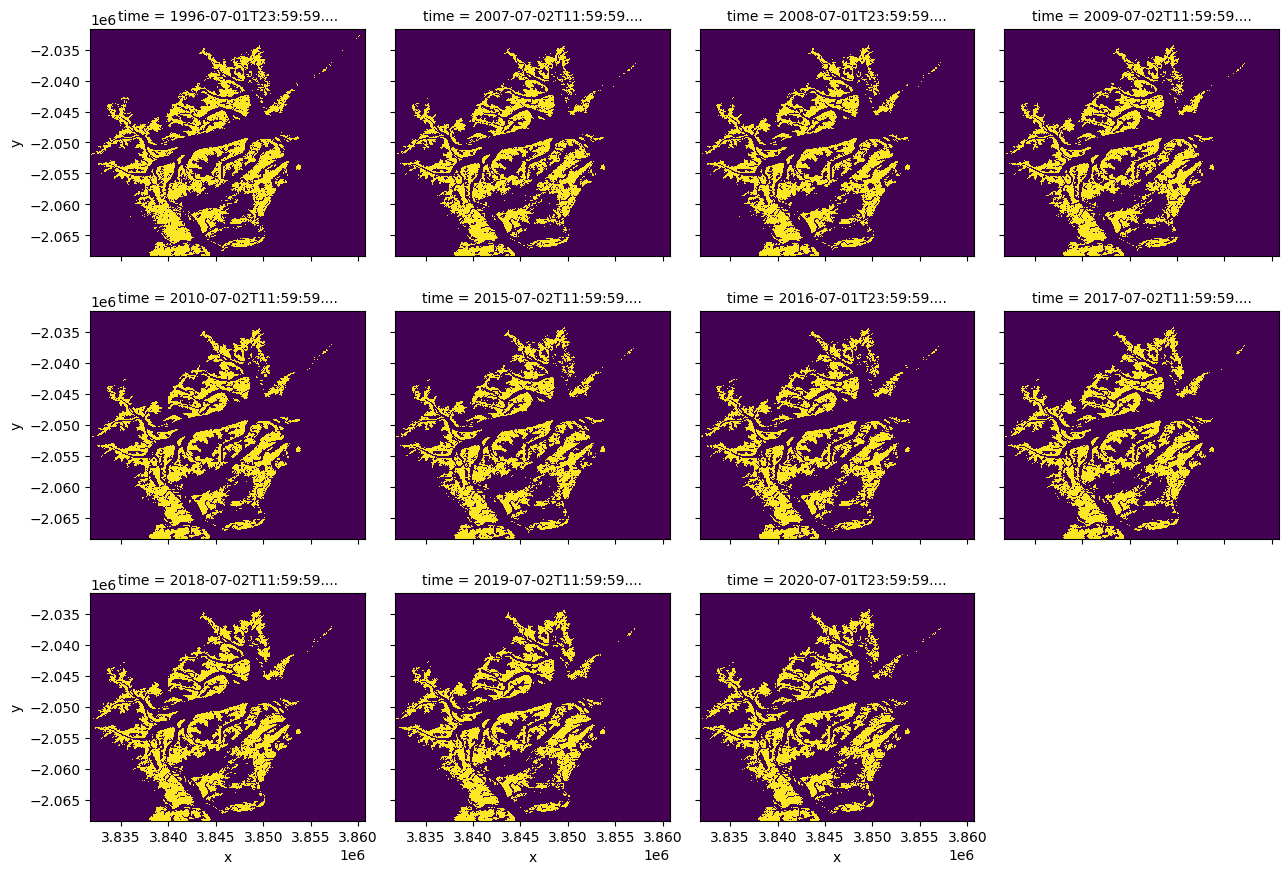

In [7]:
ds.mangrove.plot(col="time", col_wrap=4, add_colorbar=False);

## Analysis example: mangrove area calculation

In this notebook, we conduct a simple calculation of mangrove area as an analysis example. A much more comprehensive and detailed example of mangrove analysis is available in [real world examples.](../Real_world_examples/Mangrove_analysis.ipynb) The real world example classifies mangroves as 'closed' or 'regular' and identifies areas of mangrove growth and loss.


### Calculate area

We can calculate the area of mangroves in each of the seven available years, then look for change. In this case ~1,500 Ha of mangrove has disapeared since 1996. Again, the [mangrove analysis notebook](../Real_world_examples/Mangrove_analysis.ipynb) in real world examples gives a more comprehensive example of assessing changes in mangrove extent.

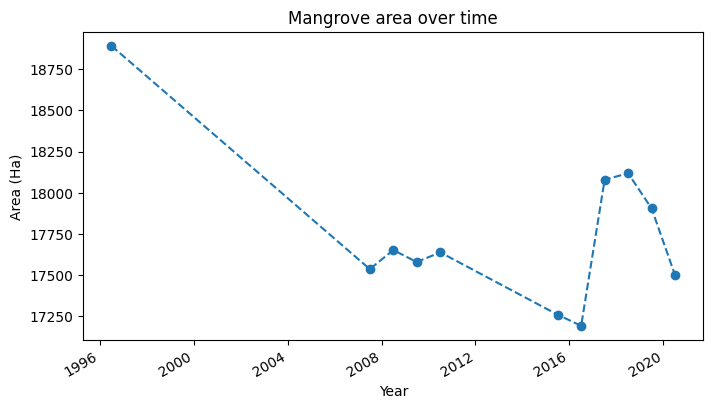

In [8]:
# Convert pixel count to ha
m2_per_ha = 10000
m2_per_pixel = query["resolution"][1] ** 2
mangrove_area = ds.mangrove.sum(dim=("x", "y")) * m2_per_pixel / m2_per_ha

mangrove_area.plot(
    x="time",
    figsize=(8,4),
    linestyle="--",
    marker="o",
)
plt.xlabel("Year")
plt.ylabel("Area (Ha)")
plt.title("Mangrove area over time");

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:**

In [9]:
print(datacube.__version__)

1.8.15


**Last tested:**

In [10]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2024-07-08'